In [128]:
# Varinder 
# Kanchan 
# Jaspreet 

In [129]:
# Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For neural network we shall use keras library
import keras
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
import math 

In [130]:
# Admissions information
df_adm = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/ADMISSIONS.csv')

# Patient info such as gender
df_pat = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/PATIENTS.csv')

# Diagnosis for each admission to hospital
df_diagcode = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/DIAGNOSES_ICD.csv')

# Intensive Care Unit (ICU) for each admission to hospital
df_icu = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/ICUSTAYS.csv')

# ICD information such as ICD9_Code and Sequence number
df_icu = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/PROCEDURES_ICD.csv')

# Information about the drug
df_icu = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/PRESCRIPTIONS.csv')

In [131]:
df_adm.isnull().any()

ROW_ID                  False
SUBJECT_ID              False
HADM_ID                 False
ADMITTIME               False
DISCHTIME               False
DEATHTIME                True
ADMISSION_TYPE          False
ADMISSION_LOCATION      False
DISCHARGE_LOCATION      False
INSURANCE               False
LANGUAGE                 True
RELIGION                 True
MARITAL_STATUS           True
ETHNICITY               False
EDREGTIME                True
EDOUTTIME                True
DIAGNOSIS                True
HOSPITAL_EXPIRE_FLAG    False
HAS_CHARTEVENTS_DATA    False
dtype: bool

In [132]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [133]:
print('We have {} number of unique admissions in our dataset.'.format(df_adm['HADM_ID'].nunique()))
print('We have {} number of unique patients in our dataset.'.format(df_adm['SUBJECT_ID'].nunique()))

We have 58976 number of unique admissions in our dataset.
We have 46520 number of unique patients in our dataset.


In [134]:
df_adm.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,4/9/2196 12:26,4/10/2196 15:54,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,4/9/2196 10:06,4/9/2196 13:24,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,9/3/2153 7:15,9/8/2153 19:10,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,10/18/2157 19:34,10/25/2157 14:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,6/6/2139 16:14,6/9/2139 12:48,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,11/2/2160 2:06,11/5/2160 14:55,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,11/2/2160 1:01,11/2/2160 4:27,ACUTE CORONARY SYNDROME,0,1


In [135]:
# Convert admission and discharge times to datatime type
df_adm['ADMITTIME'] = pd.to_datetime(df_adm['ADMITTIME'])
df_adm['DISCHTIME'] = pd.to_datetime(df_adm['DISCHTIME'])

df_adm['LOS'] = (df_adm['DISCHTIME'] - df_adm['ADMITTIME'])

In [136]:
df_adm[['ADMITTIME', 'DISCHTIME', 'LOS']]

,ADMITTIME,DISCHTIME,LOS
0,2196-04-09 12:26:00,2196-04-10 15:54:00,1 days 03:28:00
1,2153-09-03 07:15:00,2153-09-08 19:10:00,5 days 11:55:00
2,2157-10-18 19:34:00,2157-10-25 14:00:00,6 days 18:26:00
3,2139-06-06 16:14:00,2139-06-09 12:48:00,2 days 20:34:00
4,2160-11-02 02:06:00,2160-11-05 14:55:00,3 days 12:49:00
...,...,...,...
58971,2131-03-30 21:13:00,2131-04-02 15:02:00,2 days 17:49:00
58972,2151-03-05 20:00:00,2151-03-06 09:10:00,0 days 13:10:00
58973,2200-09-12 07:15:00,2200-09-20 12:08:00,8 days 04:53:00
58974,2128-11-11 02:29:00,2128-12-22 13:11:00,41 days 10:42:00


In [137]:
df_diagcode.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [138]:
print('We have {} number of unique diagnosis.'.format(df_diagcode['ICD9_CODE'].nunique()))

We have 6946 number of unique diagnosis.


In [139]:
df_adm['LOS'].describe()

count                      58976
mean     10 days 03:12:50.349294
std      12 days 10:57:37.335463
min            -1 days +01:19:00
25%              3 days 17:51:00
50%              6 days 11:12:30
75%             11 days 19:05:00
max            294 days 15:51:00
Name: LOS, dtype: object

In [140]:
# Data about patients who have lef the hospital.
df_adm[df_adm['LOS'].dt.total_seconds()/86400 < 0]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
425,534,417,102633,2177-03-23 16:17:00,2177-03-23 07:20:00,3/23/2177 7:20,URGENT,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,NaN,NaN,ORGAN DONOR ACCOUNT,1,1,-1 days +15:03:00
456,237,181,102631,2153-10-12 09:49:00,2153-10-12 06:29:00,10/12/2153 6:29,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,NaN,PROTESTANT QUAKER,MARRIED,WHITE,10/12/2153 6:23,10/12/2153 7:45,DISSECTING ANEURYSIM,1,1,-1 days +20:40:00
692,644,516,187482,2197-07-31 20:18:00,2197-07-31 01:10:00,7/31/2197 1:10,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,WIDOWED,UNKNOWN/NOT SPECIFIED,7/31/2197 11:31,7/31/2197 14:35,RESPIRATORY DISTRESS,1,0,-1 days +04:52:00
1911,1640,1334,138015,2137-09-02 14:43:00,2137-09-02 12:00:00,9/2/2137 12:00,NEWBORN,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,NaN,PROTESTANT QUAKER,NaN,WHITE,NaN,NaN,NEWBORN,1,1,-1 days +21:17:00
1970,1699,1381,181430,2189-01-02 14:25:00,2189-01-02 12:00:00,1/2/2189 12:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,UNOBTAINABLE,MARRIED,WHITE,1/2/2189 10:31,1/2/2189 15:56,STROKE;TELEMETRY,1,1,-1 days +21:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57233,57980,96810,165589,2103-09-25 20:38:00,2103-09-25 12:00:00,9/25/2103 12:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,RUSS,UNOBTAINABLE,WIDOWED,WHITE,9/25/2103 19:27,9/25/2103 21:37,CARDIAC ARREST,1,1,-1 days +15:22:00
57559,58635,98943,193747,2164-11-14 20:03:00,2164-11-14 12:00:00,11/14/2164 12:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,UNOBTAINABLE,MARRIED,WHITE,11/14/2164 18:24,11/14/2164 20:54,INTRACRANIAL HEMORRHAGE,1,1,-1 days +15:57:00
57902,58720,99207,191004,2143-07-06 19:59:00,2143-07-06 12:00:00,7/6/2143 12:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,ENGL,CATHOLIC,DIVORCED,WHITE,7/6/2143 19:30,7/6/2143 20:05,GSW L. CHEST WALL & ABDOMEN,1,1,-1 days +16:01:00
58346,55950,90642,101946,2122-04-24 14:36:00,2122-04-24 12:00:00,4/24/2122 12:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,UNABLE TO OBTAIN,NaN,NaN,ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION\CATH,1,1,-1 days +21:24:00


In [141]:
df_adm = df_adm[df_adm['LOS'].dt.total_seconds()/86400 > 0]

In [142]:
df_adm['LOS'].describe()

count                      58878
mean     10 days 03:37:49.415061
std      12 days 11:02:04.450875
min              0 days 00:02:00
25%              3 days 18:08:00
50%              6 days 11:45:00
75%             11 days 19:20:00
max            294 days 15:51:00
Name: LOS, dtype: object

In [143]:
# Data about patients who have lef the hospital.
df_adm.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LOS
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,4/9/2196 10:06,4/9/2196 13:24,BENZODIAZEPINE OVERDOSE,0,1,1 days 03:28:00
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5 days 11:55:00
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6 days 18:26:00
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2 days 20:34:00
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,11/2/2160 1:01,11/2/2160 4:27,ACUTE CORONARY SYNDROME,0,1,3 days 12:49:00


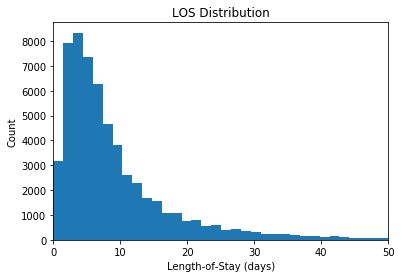

In [144]:
# Plot LOS Distribution
plt.hist(df_adm['LOS'].dt.total_seconds()/86400, bins=200)
plt.xlim(0, 50)
plt.title('LOS Distribution')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.show();

In [145]:
df_adm['ADMISSION_TYPE'].value_counts()

EMERGENCY    41989
NEWBORN       7854
ELECTIVE      7702
URGENT        1333
Name: ADMISSION_TYPE, dtype: int64

In [146]:
df_adm['DECEASED'] = df_adm['DEATHTIME'].notnull().map({True:1, False:0})

In [147]:
print("{} patients died in the hospital from {}".format(df_adm['DECEASED'].sum(),df_adm ['SUBJECT_ID'].nunique()))

5774 patients died in the hospital from 46445


In [148]:
df_adm['INSURANCE'].value_counts()

Medicare      28174
Private       22542
Medicaid       5778
Government     1781
Self Pay        603
Name: INSURANCE, dtype: int64

In [163]:
y = df_adm['HADM_ID']

In [164]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(df_adm,y, test_size=0.2)

In [165]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

TypeError: invalid type promotion